In [1]:
import os

from ammm_project.grasp import grasp_search
from ammm_project.greedy_functions import qs
from ammm_project.parsers.dat import parse
from ammm_project.problem import Problem
from ammm_project.runner import run as runner
from tqdm import tqdm
from tqdm.contrib.concurrent import thread_map

/Users/vol/UPC/ammm/ammm-project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
instances = {}

for filename in os.listdir("../instances"):
    if not filename.endswith("100-1.dat"):
        continue

    name, _ = os.path.splitext(filename)

    with open(f"../instances/{filename}", "r") as f:
        dat = parse(f)

    problem = Problem.from_dat(dat)

    instances[name] = problem

instances


{'knapsack-100-1': Problem(width=1, height=100, max_weight=2908, squares=[Square(id=0, side=1, price=100, weight=38), Square(id=1, side=1, price=44, weight=91), Square(id=2, side=1, price=66, weight=64), Square(id=3, side=1, price=12, weight=50), Square(id=4, side=1, price=58, weight=88), Square(id=5, side=1, price=89, weight=98), Square(id=6, side=1, price=76, weight=43), Square(id=7, side=1, price=67, weight=23), Square(id=8, side=1, price=1, weight=14), Square(id=9, side=1, price=5, weight=69), Square(id=10, side=1, price=60, weight=67), Square(id=11, side=1, price=19, weight=3), Square(id=12, side=1, price=85, weight=55), Square(id=13, side=1, price=53, weight=85), Square(id=14, side=1, price=16, weight=71), Square(id=15, side=1, price=41, weight=99), Square(id=16, side=1, price=56, weight=1), Square(id=17, side=1, price=50, weight=79), Square(id=18, side=1, price=18, weight=81), Square(id=19, side=1, price=48, weight=20), Square(id=20, side=1, price=94, weight=63), Square(id=21, s

In [3]:
results = []

In [4]:
for alpha in tqdm([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):

    def grasp(instance):
        return grasp_search(instance, qs["price_weight"], alpha=alpha)

    # Convert to process_map for parallelism
    def run(_: int):
        return runner(
            grasp,
            instances["knapsack-100-1"],
            max_time=5 * 60,
            max_time_since_improvement=60,
        )

    runs = thread_map(run, range(5))

    for tune, (result, iters) in enumerate(runs):
        print(result)
        results.append(("knapsack-100-1", alpha, tune, result.value, result.weight))


  0%|          | 0/11 [00:00<?, ?it/s]

0.0,0.0,41497.152557373046875e-07,7.152557373046875e-07,4149

1.1920928955078125e-06,1.1920928955078125e-06,4149
0.0,0.0,4149
9.5367431640625e-07,9.5367431640625e-07,4149


  9%|▉         | 1/11 [01:00<10:02, 60.29s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4135
0.29779601097106934,0.14889800548553467,4149
9.5367431640625e-07,9.5367431640625e-07,4149
0.0,0.0,4131
0.0,0.0,4149
0.6754310131072998,0.3377155065536499,41359.5367431640625e-07,9.5367431640625e-07,4135

1.373077154159546,0.45769238471984863,4147
1.3908779621124268,0.6954389810562134,4147
1.7633509635925293,0.5877836545308431,4149
3.6623151302337646,0.40692390335930717,4149


 18%|█▊        | 2/11 [02:04<09:20, 62.32s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
0.0,0.0,4149
0.0,0.0,4149


9.5367431640625e-07,9.5367431640625e-07,4139
0.0,0.0,4138


  0%|          | 0/5 [00:00<?, ?it/s]

0.0,0.0,4149
0.2794930934906006,0.09316436449686687,4149
0.757331132888794,0.1893327832221985,4147
1.425260066986084,0.1781575083732605,4149


 27%|██▋       | 3/11 [03:05<08:15, 61.92s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4095
0.0,0.0,4135
0.0,0.0,4120
0.0,0.0,4149
0.1813979148864746,0.0906989574432373,4136
0.0,0.0,4137
0.08490204811096191,0.04245102405548096,4149
0.36733317375183105,0.09183329343795776,4147
0.735969066619873,0.18399226665496826,4149
0.7805731296539307,0.13009552160898843,4149
0.8637678623199463,0.21594196557998657,4138
1.4636619091033936,0.20909455844334193,4149


 36%|███▋      | 4/11 [04:06<07:12, 61.75s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4136
0.0,0.0,4139
9.5367431640625e-07,9.5367431640625e-07,4133
0.0,0.0,4142
0.0,0.0,4112
0.24394702911376953,0.12197351455688477,4149
0.5531401634216309,0.27657008171081543,4128
0.2528717517852783,0.12643587589263916,4149
0.9527020454406738,0.3175673484802246,4136
1.2293078899383545,0.3073269724845886,4131
1.8774311542510986,0.3129051923751831,4136
2.0811941623687744,0.3468656937281291,4149
2.1878910064697266,0.2734863758087158,4137
2.8354592323303223,0.28354592323303224,4140
3.0281059741973877,0.30281059741973876,4138
4.410566329956055,0.2756603956222534,4149
5.037379026412964,0.29631641331840963,4149


 45%|████▌     | 5/11 [05:12<06:17, 62.96s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4119
0.0,0.0,4123
0.0,0.0,4118
0.0,0.0,4134
0.0,0.0,4114
0.35069990158081055,0.17534995079040527,4131
0.38958311080932617,0.19479155540466309,4138
0.7153770923614502,0.23845903078715006,4135
0.4317958354949951,0.21589791774749756,4136
0.5570061206817627,0.27850306034088135,4138
1.1606910228729248,0.2901727557182312,4137
1.538599967956543,0.38464999198913574,4149
1.765704870223999,0.3531409740447998,4138
5.09970498085022,0.36426464148930143,4149
5.982666015625,0.460205078125,4149
6.48993992805481,0.3817611722385182,4149
8.843682050704956,0.40198554775931616,4139
19.22805404663086,0.40910753290703955,4140
23.27503204345703,0.40129365592167293,4147
35.79052424430847,0.39330246422317,4149


 55%|█████▍    | 6/11 [06:47<06:10, 74.16s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4133
0.0,0.0,4125
0.0,0.0,4109
0.0,0.0,4119
1.1920928955078125e-06,1.1920928955078125e-06,4117
0.5224618911743164,0.2612309455871582,4120
0.3749220371246338,0.1874610185623169,4131
0.30198097229003906,0.15099048614501953,4138
0.5949862003326416,0.2974931001663208,4138
0.4666860103607178,0.2333430051803589,4129
1.1884827613830566,0.39616092046101886,4147
1.6887459754943848,0.4221864938735962,4133
1.946444034576416,0.3892888069152832,4131
2.4306039810180664,0.40510066350301105,4136
2.702960252761841,0.6757400631904602,4132
2.8186120986938477,0.4697686831156413,4147
3.794559955596924,0.4743199944496155,4137
3.955059051513672,0.6591765085856119,4137
4.699954032897949,0.46999540328979494,4142
6.486897945404053,0.4989921496464656,4147
7.078835964202881,0.6435305422002618,4139
8.402985095977783,0.6002132211412702,4149
9.375974893569946,0.5515279349158791,4149
13.581269025802612,0.5904899576435918,4149
22.208176851272583,0.5552044212818146,4149
24.194625854492188,0.5376583523220486,414

 64%|██████▎   | 7/11 [08:12<05:09, 77.45s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4140
0.0,0.0,4135
0.0,0.0,4138
0.4595167636871338,0.2297583818435669,4136
0.0,0.0,4130
9.5367431640625e-07,9.5367431640625e-07,4138
1.4389550685882568,0.47965168952941895,4132
2.1379129886627197,0.5344782471656799,4138
2.1425070762634277,0.5356267690658569,4138
3.3871991634368896,0.5645331939061483,4149
3.4782097339630127,0.5797016223271688,4142
3.7047479152679443,0.6174579858779907,4149
3.617661237716675,0.45220765471458435,4139
5.5105390548706055,0.5009580958973278,4147
8.687314748764038,0.5791543165842692,4139
10.064178943634033,0.5920105260961196,4142
18.966691732406616,0.5578438744825476,4149
44.63719606399536,0.5722717444101969,4149
57.87712287902832,0.6290991617285687,4147
60.374645948410034,0.6289025619626045,4149


 73%|███████▎  | 8/11 [10:12<04:33, 91.18s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


9.5367431640625e-07,9.5367431640625e-07,4100
0.0,0.0,4094
0.0,0.0,4122
0.6870379447937012,0.3435189723968506,4097
0.0,0.0,4119
0.0,0.0,4138
0.8977880477905273,0.29926268259684247,4149
0.6898469924926758,0.3449234962463379,4140
0.8872888088226318,0.4436444044113159,4131
1.1822090148925781,0.5911045074462891,4139
1.1714019775390625,0.5857009887695312,4127
2.2431249618530273,0.4486249923706055,4142
2.4236111640930176,0.40393519401550293,4145
2.8653669357299805,0.7163417339324951,4139
4.762823820114136,0.5292026466793485,4149
5.7608959674835205,0.6400995519426134,4135
7.18006706237793,0.718006706237793,4136
12.233105897903442,0.8155403931935629,4149
17.591660022735596,0.7648547835971998,4147
24.61684799194336,0.7240249409395105,4149
29.209972858428955,0.7124383624007062,4145
60.71735191345215,0.7685740748538247,4147
77.12209892272949,0.6321483518256515,4149


 82%|████████▏ | 9/11 [12:29<03:31, 105.56s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)
Suitcase(value=4149, weight=2906)


0.0,0.0,4094
0.0,0.0,4139
0.0,0.0,4133
0.6103899478912354,0.3051949739456177,4129
0.0,0.0,4147
0.0,0.0,4129
1.433887004852295,0.47796233495076496,4139
1.115433931350708,0.371811310450236,4137
1.6955451965332031,0.5651817321777344,4145
2.3191843032836914,0.7730614344278971,4137
2.6757428646087646,0.6689357161521912,4140
3.242544174194336,0.810636043548584,4139
17.91141700744629,0.8529246194022042,4145
21.32676911354065,1.1224615322916132,4145
25.330562114715576,1.013222484588623,4140
28.80356001853943,1.0286985720906938,4147
29.63015127182007,1.1852060508728028,4147
34.20530676841736,1.0060384343652164,4147
43.9510600566864,1.022117675736893,4147
50.93326807022095,1.0394544504126724,4149


 91%|█████████ | 10/11 [14:20<01:47, 107.25s/it]

Suitcase(value=4149, weight=2906)
Suitcase(value=4147, weight=2905)
Suitcase(value=4147, weight=2908)
Suitcase(value=4147, weight=2908)
Suitcase(value=4147, weight=2905)


0.0,0.0,4139
0.0,0.0,4099
0.0,0.0,4078
1.1920928955078125e-06,1.1920928955078125e-06,4049
2.169776201248169,1.0848881006240845,4137
0.0,0.0,3918
3.2956511974334717,1.6478255987167358,4108
15.507476329803467,2.5845793883005777,4118
14.902775049209595,3.7256937623023987,4009
17.552778959274292,3.510555791854858,4049
21.4798002243042,2.386644469367133,4127
22.420489072799683,2.8025611340999603,4118
23.005172967910767,2.3005172967910767,4137
24.75683283805847,3.5366904054369246,4078
42.72753405570984,3.286733388900757,4095
46.29728102684021,3.0864854017893473,4118
47.600768089294434,2.644487116071913,4127
53.19344735145569,2.6596723675727842,4133
70.78647017478943,2.2120771929621696,4136
73.31316590309143,2.528040203554877,4137


100%|██████████| 11/11 [16:34<00:00, 90.42s/it] 

Suitcase(value=4137, weight=2905)
Suitcase(value=4137, weight=2905)
Suitcase(value=4136, weight=2905)
Suitcase(value=4137, weight=2905)
Suitcase(value=4139, weight=2906)


In [5]:
for alpha in tqdm([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    def grasp(instance):
        return grasp_search(instance, qs["side"], alpha=alpha)

    # Convert to process_map for parallelism
    def run(_: int):
        return runner(
            grasp,
            instances["bin_packing-100-1"],
            max_time=5 * 60,
            max_time_since_improvement=60,
        )

    runs = thread_map(run, range(5))

    for tune, (result, iters) in enumerate(runs):
        print(result)
        results.append(("bin_packing-100-1", alpha, tune, result.value, result.weight))



  0%|          | 0/11 [00:00<?, ?it/s]

0.0,0.0,19676
0.0,0.0,19676
0.0,0.0,19676
0.0,0.0,19676
0.0,0.0,19676


  9%|▉         | 1/11 [01:04<10:45, 64.57s/it]

Suitcase(value=19676, weight=19676)
Suitcase(value=19676, weight=19676)
Suitcase(value=19676, weight=19676)
Suitcase(value=19676, weight=19676)
Suitcase(value=19676, weight=19676)


0.0,0.0,19775
9.5367431640625e-07,9.5367431640625e-07,19775
0.0,0.0,19550
9.5367431640625e-07,9.5367431640625e-07,19550
0.0,0.0,19315
16.622977018356323,8.311488509178162,19639
30.43538999557495,10.145129998524984,19676
32.72486710548401,10.908289035161337,19775
64.2207441329956,12.84414882659912,19775


 18%|█▊        | 2/11 [03:10<15:04, 100.55s/it]

Suitcase(value=19775, weight=19775)
Suitcase(value=19775, weight=19775)
Suitcase(value=19775, weight=19775)
Suitcase(value=19775, weight=19775)
Suitcase(value=19676, weight=19676)


0.0,0.0,19915
1.1920928955078125e-06,1.1920928955078125e-06,19775
0.0,0.0,19516
9.5367431640625e-07,9.5367431640625e-07,19890
0.0,0.0,19226
13.673764944076538,6.836882472038269,19872
15.091156959533691,7.545578479766846,19676
22.83100390434265,11.415501952171326,19676
27.13301110267639,9.044337034225464,19973
38.390164852142334,9.597541213035583,19936
47.079869985580444,9.415973997116089,20000
48.541528940200806,12.135382235050201,19872
85.444406747818,12.206343821116857,19883
121.65173888206482,6.75842993789249,19900
127.96341681480408,5.8165189461274585,19911
132.33260488510132,5.293304195404053,19927
155.9768509864807,3.899421274662018,19950


 27%|██▋       | 3/11 [06:47<20:29, 153.69s/it]

Suitcase(value=19950, weight=19950)
Suitcase(value=19973, weight=19973)
Suitcase(value=19872, weight=19872)
Suitcase(value=19936, weight=19936)
Suitcase(value=20000, weight=20000)


1.1920928955078125e-06,1.1920928955078125e-06,19837
0.0,0.0,19550
0.0,0.0,19100
0.0,0.0,19744
0.0,0.0,19510
14.764041900634766,7.382020950317383,19830
13.117558002471924,6.558779001235962,19414
15.627538204193115,7.813769102096558,19645
26.293334007263184,8.764444669087728,19815
28.667989253997803,9.555996417999268,19836
31.96715998649597,10.655719995498657,19676
38.462910890579224,9.615727722644806,19856
61.75527811050415,12.35105562210083,19775
73.46394801139832,12.243991335233053,19854
90.09979701042175,10.011088556713528,19920
94.36481475830078,8.578619523481889,19879
107.42094421386719,6.318879071403952,19936


 36%|███▋      | 4/11 [09:34<18:34, 159.22s/it]

Suitcase(value=19936, weight=19936)
Suitcase(value=19830, weight=19830)
Suitcase(value=19879, weight=19879)
Suitcase(value=19837, weight=19837)
Suitcase(value=19836, weight=19836)


0.0,0.0,19654
9.5367431640625e-07,9.5367431640625e-07,19556
0.0,0.0,17975
0.0,0.0,19271
0.0,0.0,19471
6.3163001537323,3.15815007686615,19646
6.989049673080444,3.494524836540222,19815
8.580766916275024,2.8602556387583413,19875
10.233463048934937,3.411154349644979,19676
19.66420292854309,6.554734309514363,19775
39.79680395126343,5.685257707323347,19743


90.84309887886047,3.78512911995252,19830


 45%|████▌     | 5/11 [12:06<15:38, 156.41s/it]

Suitcase(value=19676, weight=19676)
Suitcase(value=19875, weight=19875)
Suitcase(value=19815, weight=19815)
Suitcase(value=19775, weight=19775)
Suitcase(value=19830, weight=19830)


0.0,0.0,19469
0.0,0.0,19216
0.0,0.0,17975
0.0,0.0,17975
0.0,0.0,19100
6.344558954238892,3.172279477119446,19499
7.913017272949219,3.9565086364746094,19654
8.001168012619019,4.000584006309509,18076
26.323753118515015,6.580938279628754,19446
27.632400035858154,5.526480007171631,19514
27.045690774917603,6.761422693729401,19216
38.04237127304077,6.340395212173462,19516
45.21272015571594,6.458960022245135,19518
77.87744188308716,7.079767443917015,19533
79.57730221748352,6.63144185145696,19519
88.5549681186676,6.325354865619114,19734
107.03598189353943,5.633472731238918,19630
127.08777213096619,4.706954523369118,19654


163.05496406555176,3.6234436459011503,19676
195.96447205543518,2.8400648123976113,19677


 55%|█████▍    | 6/11 [16:23<15:53, 190.60s/it]

Suitcase(value=19734, weight=19734)
Suitcase(value=19677, weight=19677)
Suitcase(value=19216, weight=19216)
Suitcase(value=19514, weight=19514)
Suitcase(value=19654, weight=19654)


0.0,0.0,19676
0.0,0.0,19516
0.0,0.0,15904
0.0,0.0,18076
0.0,0.0,18421
13.340121984481812,6.670060992240906,19118
12.53941011428833,6.269705057144165,19216
15.00941801071167,5.00313933690389,18704
25.55945587158203,6.389863967895508,19578
50.90242385864258,8.483737309773764,19479


57.45212388038635,8.207446268626622,19533
68.28808093070984,7.5875645478566485,19414
68.43996286392212,7.604440318213569,19887
77.81063508987427,7.781063508987427,19775
95.82269406318665,6.8444781473704746,19751


 64%|██████▎   | 7/11 [19:00<11:58, 179.68s/it]

Suitcase(value=19676, weight=19676)
Suitcase(value=19775, weight=19775)
Suitcase(value=19887, weight=19887)
Suitcase(value=19751, weight=19751)
Suitcase(value=18704, weight=18704)


1.1920928955078125e-06,1.1920928955078125e-06,15904
0.0,0.0,15904
0.0,0.0,15904
0.0,0.0,17350
0.0,0.0,18079
8.1583731174469,4.07918655872345,16211
15.430787086486816,5.1435956954956055,17975
17.89919400215149,5.966398000717163,17975
19.6253559589386,9.8126779794693,18615
20.81579613685608,6.938598712285359,17212
25.579560041427612,8.526520013809204,18351
32.81044602394104,8.20261150598526,18236
39.589776039123535,7.917955207824707,18766
55.41067290306091,11.082134580612182,19469
60.32576894760132,8.617966992514473,18751


 73%|███████▎  | 8/11 [21:02<08:03, 161.31s/it]

Suitcase(value=18751, weight=18751)
Suitcase(value=19469, weight=19469)
Suitcase(value=18766, weight=18766)
Suitcase(value=18351, weight=18351)
Suitcase(value=18236, weight=18236)


0.0,0.0,15904
0.0,0.0,16940
0.0,0.0,18236
0.0,0.0,17446
0.0,0.0,18076
15.738629817962646,5.246209939320882,16940
48.6205997467041,9.724119949340821,17804
58.22389197349548,11.644778394699097,18236


92.63854789733887,9.263854789733887,18200
141.65728378295898,6.1590123383895214,18426
144.10700869560242,6.004458695650101,18685
153.49507308006287,5.481966895716531,18975


 82%|████████▏ | 9/11 [24:37<05:56, 178.02s/it]

Suitcase(value=18236, weight=18236)
Suitcase(value=18076, weight=18076)
Suitcase(value=18975, weight=18975)
Suitcase(value=18236, weight=18236)
Suitcase(value=17446, weight=17446)


0.0,0.0,15904
0.0,0.0,18236
0.0,0.0,17191
7.781222820281982,3.890611410140991,17246
0.0,0.0,18076
0.0,0.0,17347
41.07286810874939,13.690956036249796,18704


37.867985010147095,9.466996252536774,18346
64.4092869758606,12.88185739517212,18616


 91%|█████████ | 10/11 [26:43<02:41, 161.97s/it]

Suitcase(value=17347, weight=17347)
Suitcase(value=18704, weight=18704)
Suitcase(value=18076, weight=18076)
Suitcase(value=18616, weight=18616)
Suitcase(value=18236, weight=18236)


0.0,0.0,15904
0.0,0.0,15904
0.0,0.0,13879
0.0,0.0,14140
51.678648233413696,25.839324116706848,17775


0.0,0.0,15375
39.78105068206787,19.890525341033936,17463
83.75407981872559,27.918026606241863,17804
108.86353468894958,21.772706937789916,18235


100%|██████████| 11/11 [29:32<00:00, 161.13s/it]

Suitcase(value=15375, weight=15375)
Suitcase(value=15904, weight=15904)
Suitcase(value=18235, weight=18235)
Suitcase(value=17775, weight=17775)
Suitcase(value=14140, weight=14140)


In [6]:
for alpha in tqdm([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    def grasp(instance):
        return grasp_search(instance, qs["price"], alpha=alpha)

    # Convert to process_map for parallelism
    def run(_: int):
        return runner(
            grasp,
            instances["mix-100-1"],
            max_time=5 * 60,
            max_time_since_improvement=60,
        )

    runs = thread_map(run, range(5))

    for tune, (result, iters) in enumerate(runs):
        print(result)
        results.append(("mix-100-1", alpha, tune, result.value, result.weight))


  0%|          | 0/11 [00:00<?, ?it/s]

0.0,0.0,10748
0.0,0.0,10746
0.0,0.0,10743
0.0,0.0,10743
0.0,0.0,10743
37.42559623718262,18.71279811859131,10762
44.47116684913635,22.235583424568176,10754


  9%|▉         | 1/11 [01:46<17:43, 106.39s/it]

Suitcase(value=10743, weight=9384)
Suitcase(value=10743, weight=9384)
Suitcase(value=10754, weight=9623)
Suitcase(value=10762, weight=9504)
Suitcase(value=10743, weight=9384)


0.0,0.0,10762
0.0,0.0,10752
0.0,0.0,10762
0.0,0.0,10741
0.0,0.0,10723
52.6781861782074,26.3390930891037,10754


 18%|█▊        | 2/11 [03:40<16:38, 111.00s/it]

Suitcase(value=10752, weight=9380)
Suitcase(value=10754, weight=9623)
Suitcase(value=10723, weight=9325)
Suitcase(value=10762, weight=9504)
Suitcase(value=10762, weight=9504)


0.0,0.0,10754
0.0,0.0,10743
0.0,0.0,10746
0.0,0.0,10683
0.0,0.0,10705
55.11867117881775,27.559335589408875,10733
52.650514125823975,26.325257062911987,10748


 27%|██▋       | 3/11 [06:22<17:54, 134.31s/it]

Suitcase(value=10733, weight=9579)
Suitcase(value=10743, weight=9384)
Suitcase(value=10705, weight=9343)
Suitcase(value=10748, weight=9534)
Suitcase(value=10754, weight=9623)


9.5367431640625e-07,9.5367431640625e-07,10754
0.0,0.0,10748
9.5367431640625e-07,9.5367431640625e-07,10754
0.0,0.0,10747


 36%|███▋      | 4/11 [08:28<15:16, 131.00s/it]

0.0,0.0,10758
Suitcase(value=10754, weight=9623)
Suitcase(value=10754, weight=9623)
Suitcase(value=10748, weight=9534)
Suitcase(value=10747, weight=9403)
Suitcase(value=10758, weight=9486)


0.0,0.0,10748
0.0,0.0,10750
0.0,0.0,10732
0.0,0.0,10723


 45%|████▌     | 5/11 [11:02<13:55, 139.22s/it]

0.0,0.0,10703
Suitcase(value=10748, weight=9534)
Suitcase(value=10703, weight=9326)
Suitcase(value=10723, weight=9293)
Suitcase(value=10750, weight=9465)
Suitcase(value=10732, weight=9476)


1.1920928955078125e-06,1.1920928955078125e-06,10754
7.152557373046875e-07,7.152557373046875e-07,10748
0.0,0.0,10750
0.0,0.0,10735
0.0,0.0,10725
53.171030044555664,26.585515022277832,10754


 55%|█████▍    | 6/11 [12:59<10:59, 131.81s/it]

Suitcase(value=10754, weight=9623)
Suitcase(value=10748, weight=9534)
Suitcase(value=10750, weight=9465)
Suitcase(value=10725, weight=9434)
Suitcase(value=10754, weight=9623)


0.0,0.0,10754
9.5367431640625e-07,9.5367431640625e-07,10754
0.0,0.0,10721
0.0,0.0,10754
0.0,0.0,10750
48.74186706542969,24.370933532714844,10754


41.50413393974304,20.75206696987152,10733


 64%|██████▎   | 7/11 [15:07<08:41, 130.42s/it]

Suitcase(value=10754, weight=9623)
Suitcase(value=10754, weight=9623)
Suitcase(value=10733, weight=9579)
Suitcase(value=10754, weight=9623)
Suitcase(value=10754, weight=9623)


0.0,0.0,10754
1.1920928955078125e-06,1.1920928955078125e-06,10750
9.5367431640625e-07,9.5367431640625e-07,10746
9.5367431640625e-07,9.5367431640625e-07,10750
0.0,0.0,10741


 73%|███████▎  | 8/11 [16:53<06:07, 122.67s/it]

Suitcase(value=10754, weight=9623)
Suitcase(value=10750, weight=9465)
Suitcase(value=10750, weight=9465)
Suitcase(value=10741, weight=9492)
Suitcase(value=10746, weight=9446)


0.0,0.0,10754
0.0,0.0,10733
0.0,0.0,10721
9.5367431640625e-07,9.5367431640625e-07,10753
0.0,0.0,10705
46.260333776474,23.130166888237,10762
39.28759980201721,19.643799901008606,10726


 82%|████████▏ | 9/11 [18:40<03:55, 117.71s/it]

Suitcase(value=10762, weight=9504)
Suitcase(value=10754, weight=9623)
Suitcase(value=10726, weight=9355)
Suitcase(value=10733, weight=9579)
Suitcase(value=10705, weight=9343)


0.0,0.0,10721
9.5367431640625e-07,9.5367431640625e-07,10750
0.0,0.0,10721
26.638372659683228,13.319186329841614,10754
0.0,0.0,10721
36.81962323188782,18.40981161594391,10754
0.0,0.0,10750


44.81417798995972,22.40708899497986,10750


 91%|█████████ | 10/11 [20:26<01:54, 114.19s/it]

Suitcase(value=10754, weight=9623)
Suitcase(value=10754, weight=9623)
Suitcase(value=10750, weight=9599)
Suitcase(value=10721, weight=9540)
Suitcase(value=10750, weight=9599)


0.0,0.0,10735
9.489059448242188e-05,9.489059448242188e-05,10750
0.0,0.0,10721
0.0,0.0,10733
42.42109394073486,21.21054697036743,10736
59.02079796791077,29.510398983955383,10754
54.38646697998047,27.193233489990234,10754
75.52037501335144,25.173458337783813,10754


1.1920928955078125e-06,1.1920928955078125e-06,10729


100%|██████████| 11/11 [22:45<00:00, 124.18s/it]

Suitcase(value=10754, weight=9623)
Suitcase(value=10729, weight=9421)
Suitcase(value=10733, weight=9579)
Suitcase(value=10754, weight=9623)
Suitcase(value=10754, weight=9623)


In [7]:
import pandas as pd

df = pd.DataFrame(results, columns=["instance", "alpha", "tune", "value", "weight"])

# Save results
#df.to_csv("tuning.csv", index=False)

In [12]:
import seaborn as sns

df = pd.read_csv("tuning.csv")


mean_objective_by_instance_alpha = df.groupby(["instance", "alpha"])["value"].mean().reset_index()
mean_objective_by_instance_alpha

,instance,alpha,value
0,bin_packing-100-1,0.0,19676.0
1,bin_packing-100-1,0.1,19755.2
2,bin_packing-100-1,0.2,19946.2
3,bin_packing-100-1,0.3,19863.6
4,bin_packing-100-1,0.4,19794.2
5,bin_packing-100-1,0.5,19559.0
6,bin_packing-100-1,0.6,19558.6
7,bin_packing-100-1,0.7,18714.6
8,bin_packing-100-1,0.8,18193.8
9,bin_packing-100-1,0.9,18195.8


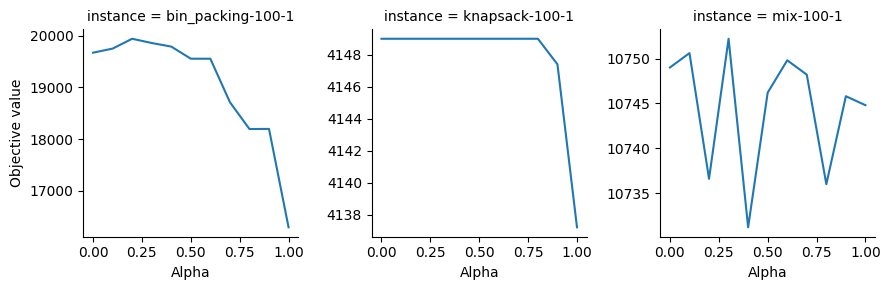

In [14]:
# FacetGrid with mean objective value by instance and alpha
g = sns.FacetGrid(mean_objective_by_instance_alpha, col="instance", col_wrap=3, sharey=False)
g.map(sns.lineplot, "alpha", "value")
g.set_axis_labels("Alpha", "Objective value")
